# Abgetastetes und gefiltertes "Sensorsignal" im Frequenzbereich

Notebook zu Aufgabe "Filterung des Sensorsignals im Frequenzbereich"

In [16]:
import numpy as np
from numpy import pi, cos, log10
import scipy.signal as sig

import matplotlib.pyplot as plt
%matplotlib inline
figsize1 = (10,10)

import sys
sys.path.append("..")
import dsp_fpga_lib as dsp

Ts = 1/200.0     # sampling period
f1 = 50.0      # signal frequency
phi0  = 0        # signal initial phase
Tmax = 6.0/f1  # time for 6 signal periods
N_Ts = Tmax / Ts # No. of samples in Tmax
# -- Sampled input signal and filter coeffs.
n = np.arange(0,round(N_Ts)) # sample n
xn = 1.5 + 0.5 * cos(2.0 * pi*f1*n*Ts + phi0)
b = np.ones(3)/3; a = 1 # MA-filter, N = 5
b = np.convolve([1,1,1],[1,1,1]); a = 1
b = [1, 0]; a = [1, -0.9] # lossy integr.
b = [1,2,1]; a = [1]
#p = [1 + 1j, 1 + 1j, 1]
#b = np.poly(p); a = 1

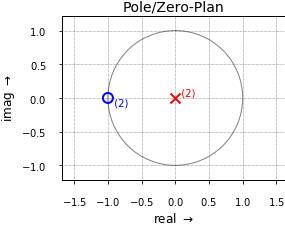

In [17]:
# ----- P/Z-Plot -----
fig1, ax1 = plt.subplots(1, figsize=(4,3)) # erzeuge nur einen Subplot
ax1.grid(True)
ax1.set_title('Pole/Zero-Plan')
ax1.set_xlabel(r'real $\rightarrow$')
ax1.set_ylabel(r'imag $\rightarrow$')
dsp.zplane(b,a);

*** grpdelay warning: group delay singular -> setting to 0 at:
f = 100.0 


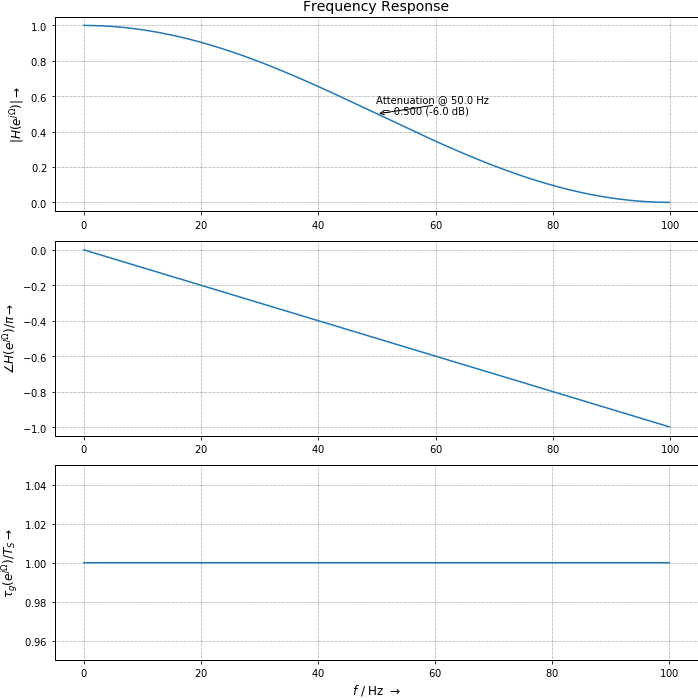

In [18]:
# ----- frequency response -----
fig2, (ax21,ax22,ax23) = plt.subplots(3,1, figsize=figsize1)
[W, H] = sig.freqz(b, a, whole=0);
f = W  / (Ts * 2 * pi)
(w,Asig) = sig.freqz(b,a, f1*Ts*2*pi)
H_mx = np.max(abs(H))
H = H / H_mx; Asig = abs(Asig)/H_mx
#
ax21.plot(f,abs(H))
ax21.set_ylabel(r'$|H(e^{j \Omega})| \rightarrow$')
ax21.set_title('Frequency Response')
ax21.annotate('Attenuation @ %.1f Hz \n \
 = %1.3f (%3.1f dB)'%(f1,Asig,20*log10(Asig)),\
(f1, Asig),(0.5,0.5),textcoords='axes fraction',\
arrowprops=dict(arrowstyle="->"))
#
ax22.plot(f, np.angle(H)/pi)
ax22.set_ylabel(r'$\angle H(e^{j\Omega}) / \pi \rightarrow $')
#
tau, w = dsp.grpdelay(b,a, nfft = 2048, Fs = 200, whole=0)
ax23.plot(w, tau)
ymin, ymax = ax23.get_ylim(); dy = max(ymax - ymin, 1) * 0.05
ax23.set_ylim(ymin - dy, ymax + dy) # set reasonable range
ax23.set_xlabel(r'$f$ / Hz $\rightarrow$')
ax23.set_ylabel(r'$\tau_g(e^{j \Omega}) / T_S \rightarrow$')
fig2.set_tight_layout(True)

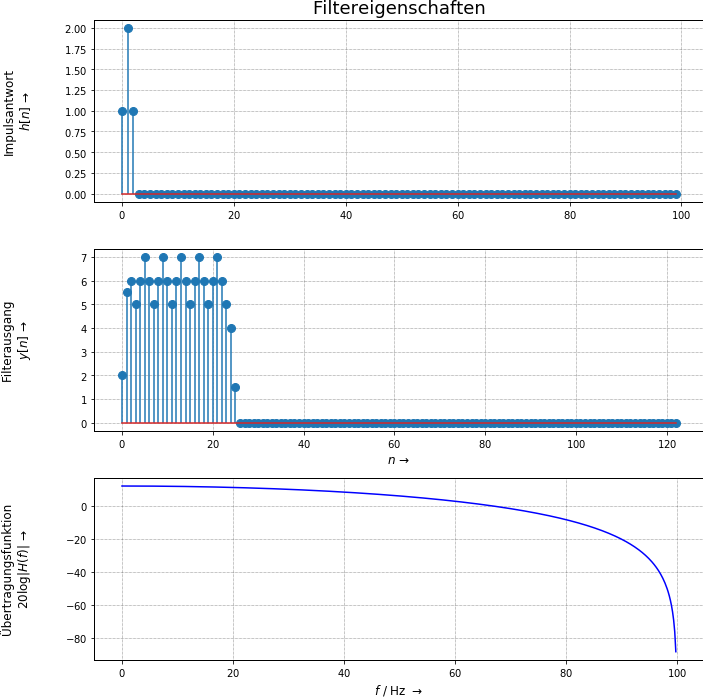

In [19]:
fig3, (ax31,ax32,ax33) = plt.subplots(3,1, figsize=figsize1)

h, t = dsp.impz(b,a) # impulse response
ax31.stem(range(len(h)),h, use_line_collection=True)
ax31.grid(True)
ax31.set_ylabel(r'Impulsantwort' '\n' r'$h[n]\, \rightarrow$')
ax31.yaxis.set_label_coords(-0.1, 0.5)
ax31.set_title('Filtereigenschaften', fontsize=18)
#
yn = np.convolve(xn,h) # Faltung (Convolution) von x und h
ax32.grid(True)
ax32.stem(range(len(yn)),yn, use_line_collection=True)
ax32.set_xlabel(r'$n \, \rightarrow$')
ax32.set_ylabel(r'Filterausgang' '\n' r'$y[n]\, \rightarrow$')
ax32.yaxis.set_label_coords(-0.1, 0.5)
#
w,h = sig.freqz(h); f =  w / (2*pi*Ts)
ax33.plot(f, 20*log10(abs(h)), 'b')
ax33.set_ylabel(r'Übertragungsfunktion' '\n' r'$20 \log |H(f)|\, \rightarrow$')
ax33.set_xlabel(r'$f$ / Hz $\rightarrow$')
ax33.yaxis.set_label_coords(-0.1, 0.5)
ax33.grid(True)
#fig3.subplots_adjust(left=0.18, bottom=None, right=0.95, top=0.92,
#                wspace=None, hspace=0.5)
fig3.set_tight_layout(True)

### Aufgaben und Experimente
- xxx

***
### Copyright

(c) 2016 - 2020 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.